# 머신러닝 프로세스

## 성능평가 기법

#### 회귀분석

In [2]:
# MAE
from sklearn.metrics import mean_absolute_error

# MSE
from sklearn.metrics import mean_squared_error

# RMSE
from sklearn.metrics import mean_squared_error
import numpy as np

# MSLE
from sklearn.metrics import mean_squared_log_error

#MAPE(MAE 퍼센트로 계산)
import numpy as np
def MAPE(y_test, y_pred):
    mape=np.mean(np.abs((y_test-y_pred)/y_test))*100
    return mape

#### 분류분석

In [4]:
# 정확도(Accuracy)
from sklearn.metrics import accuracy_score

# 혼동행령(coufusion Matrix)
from sklearn.metrics import confusion_matrix

# 정밀도 
from sklearn.metrics import precision_score

# 재현율
from sklearn.metrics import recall_score

#F1 score
from sklearn.metrics import f1_score

# ROC_AUC
from sklearn.metrics import roc_curve,auc
fpr, tpr, thres = roc_curve(y_test, y_pred, pos_label =1)
import matplotlib.pyplot as plt
plt.plot(fpr,tpr)
auc = auc(fpr,tpr)

NameError: name 'y_test' is not defined

## 머신러닝 분석과정 빠르게 맛보기 - 회귀분석

#### 데이터 확인

In [15]:
import pandas as pd

In [45]:
import warnings
warnings.filterwarnings('ignore')
from sklearn import datasets
df, y = datasets.fetch_openml('boston', return_X_y=True)


In [46]:
df['PRICE'] = y

In [47]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [48]:
df.shape

(506, 14)

In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   CRIM     506 non-null    float64 
 1   ZN       506 non-null    float64 
 2   INDUS    506 non-null    float64 
 3   CHAS     506 non-null    category
 4   NOX      506 non-null    float64 
 5   RM       506 non-null    float64 
 6   AGE      506 non-null    float64 
 7   DIS      506 non-null    float64 
 8   RAD      506 non-null    category
 9   TAX      506 non-null    float64 
 10  PTRATIO  506 non-null    float64 
 11  B        506 non-null    float64 
 12  LSTAT    506 non-null    float64 
 13  PRICE    506 non-null    float64 
dtypes: category(2), float64(12)
memory usage: 49.0 KB


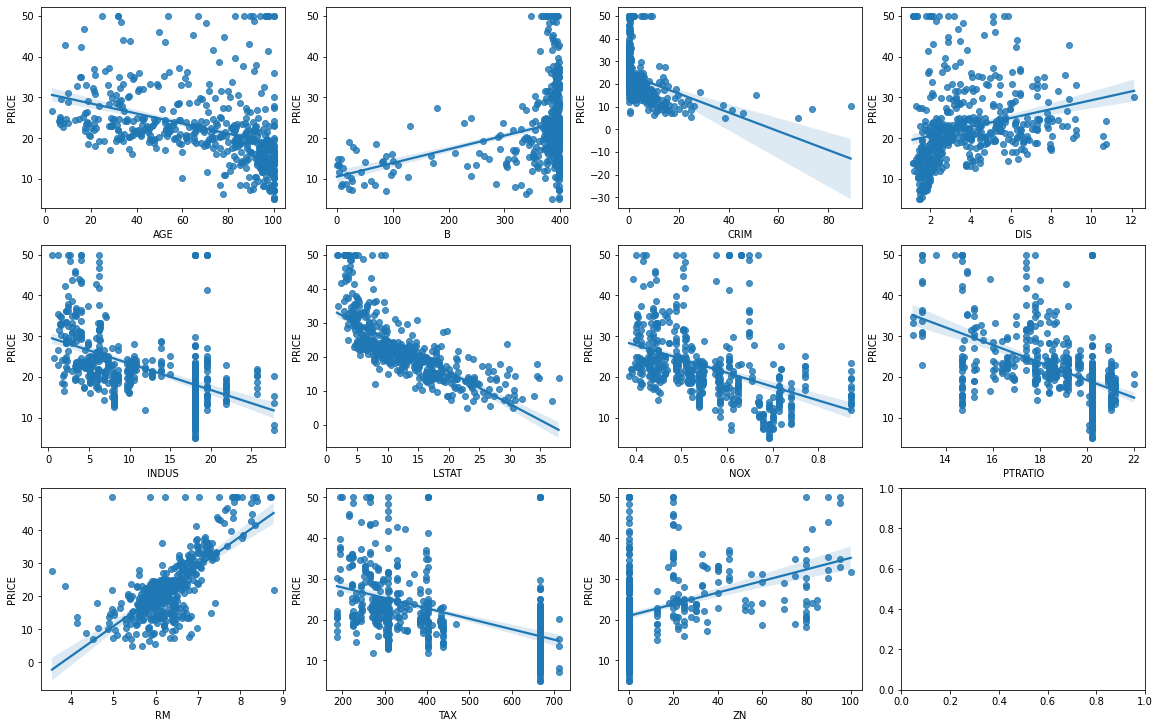

In [51]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axs = plt.subplots(figsize=(16,10), ncols=4, nrows= 3, constrained_layout=True) #constrained_layout=True 그래프사이의 간격 자동생성
features = df.columns.difference(['PRICE',"CHAS","RAD"]) # 특정컬럼 제외
for i, feature in zip(range(11), features):
    row= int(i/4)
    col = i%4
    sns.regplot(x=feature, y =df['PRICE'],data=df, ax =axs[row][col])

In [54]:
features

Index(['AGE', 'B', 'CRIM', 'DIS', 'INDUS', 'LSTAT', 'NOX', 'PTRATIO', 'RM',
       'TAX', 'ZN'],
      dtype='object')

#### 데이터 분할

In [55]:
from sklearn.model_selection import train_test_split
x = df[['AGE', 'B', 'CRIM', 'DIS', 'INDUS', 'LSTAT', 'NOX', 'PTRATIO', 'RM',
       'TAX', 'ZN']].values
y= df['PRICE'].values
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size= 0.2, random_state=42)

In [57]:
print('학습데이터세트 PRICE 평균: ', y_train.mean())
print('평가데이터세트 PRICE 평균: ', y_test.mean())

학습데이터세트 PRICE 평균:  22.796534653465343
평가데이터세트 PRICE 평균:  21.488235294117644


#### 전처리

In [63]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x_train_scaled = scaler.fit_transform(x_train)

#### 모델학습

In [65]:
from sklearn.linear_model import LinearRegression
linear = LinearRegression()
linear.fit(x_trian_scaled, y_train)

LinearRegression()

In [70]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.metrics import r2_score
import numpy as np

pred_train = linear.predict(x_train_scaled)

mae = mean_absolute_error(y_train, pred_train)
mse = mean_squared_error(y_train, pred_train)
rmse = np.sqrt(mse)
r2 = r2_score(y_train,pred_train)

print('MAE: {0: .5f}'.format(mae))
print('MSE: {0: .5f}'.format(mse))
print('RMSE: {0: .5f}'.format(rmse))
print('R2: {0: .5f}'.format(r2))

MAE:  3.32907
MSE:  22.90499
RMSE:  4.78592
R2:  0.73634


#### 성능평가 및 예측값 저장

In [72]:
x_test_scaled = scaler.transform(x_test)
pred = linear.predict(x_test_scaled)

In [73]:
mae = mean_absolute_error(y_test, pred)
mse = mean_squared_error(y_test, pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test,pred)

print('MAE: {0: .5f}'.format(mae))
print('MSE: {0: .5f}'.format(mse))
print('RMSE: {0: .5f}'.format(rmse))
print('R2: {0: .5f}'.format(r2))

MAE:  3.40993
MSE:  27.07645
RMSE:  5.20350
R2:  0.63078


In [74]:
pred_df = pd.DataFrame(pred, columns=['pred Price'])
pred_df.head()

,pred Price
0,29.101388
1,32.947200
2,19.292694
3,25.225986
4,18.452485


In [75]:
actual = pd.DataFrame(y_test, columns=['actual Price'])
actual.head()

,actual Price
0,23.6
1,32.4
2,13.6
3,22.8
4,16.1


In [78]:
reg_result = pd.concat([actual, pred_df], axis=1)
reg_result.to_csv('reg_result.csv', index=False, encoding='utf-8-sig')
reg_result.head()

,actual Price,pred Price
0,23.6,29.101388
1,32.4,32.947200
2,13.6,19.292694
3,22.8,25.225986
4,16.1,18.452485


### 머신러닝 분석과정 빠르게 맛보기 - 분류분석

#### 데이터 확인

In [81]:
from sklearn.datasets import load_iris

iris=load_iris()
iris_dt = iris.data
iris_label = iris.target

df = pd.DataFrame(data=iris_dt, columns=iris.feature_names)
df['label']=iris_label

In [82]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),label
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [84]:
df.shape

(150, 5)

#### 데이터 분할

In [86]:
x_train, x_test,y_train,y_test = train_test_split(iris_dt, iris_label, test_size=0.2, random_state=0, stratify=iris_label)

#### 전처리

In [89]:
df.isna().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
label                0
dtype: int64

#### 모델학습

In [90]:
from sklearn.tree import DecisionTreeClassifier
dtree_clf_5 = DecisionTreeClassifier(max_depth=5, random_state=100)
dtree_clf_3 = DecisionTreeClassifier(max_depth=3, random_state=100)
dtree_clf_1 = DecisionTreeClassifier(max_depth=1, random_state=100)

In [94]:
from sklearn.model_selection import cross_val_score
import numpy as np
scores= cross_val_score(dtree_clf_5, x_train, y_train, scoring='accuracy',cv=10)
print('교차검증 정확도: ', np.round(scores,3))
print('평균검증 정확도: ', np.round(np.mean(scores),4))


교차검증 정확도:  [0.917 1.    0.917 1.    1.    0.833 1.    0.917 1.    0.833]
평균검증 정확도:  0.9417


In [95]:
scores= cross_val_score(dtree_clf_3, x_train, y_train, scoring='accuracy',cv=10)
print('교차검증 정확도: ', np.round(scores,3))
print('평균검증 정확도: ', np.round(np.mean(scores),4))

교차검증 정확도:  [0.917 1.    0.917 0.917 1.    0.833 1.    0.917 0.917 0.833]
평균검증 정확도:  0.925


In [96]:
scores= cross_val_score(dtree_clf_1, x_train, y_train, scoring='accuracy',cv=10)
print('교차검증 정확도: ', np.round(scores,3))
print('평균검증 정확도: ', np.round(np.mean(scores),4))

교차검증 정확도:  [0.667 0.667 0.667 0.667 0.667 0.667 0.667 0.667 0.667 0.667]
평균검증 정확도:  0.6667


#### 성능평가 및 예측값 저장

In [100]:
dtree_clf_5.fit(x_train,y_train)
pred = dtree_clf_5.predict(x_test)
from sklearn.metrics import accuracy_score
print('의사결정나무(교차검증 후) 예측 정확도: {0: .5f}'.format(accuracy_score(y_test,pred)))

의사결정나무(교차검증 후) 예측 정확도:  0.96667


In [102]:
pred = pd.DataFrame(pred, columns=['pred Species'])
pred.head()

,pred Species
0,0
1,1
2,0
3,2
4,0


In [105]:
actual = pd.DataFrame(y_test, columns=['actual Species'])
actual.head()

,actual Species
0,0
1,1
2,0
3,2
4,0


In [107]:
classify_result = pd.concat([acutal, pred], axis =1)
classify_result.to_csv('clf_result.csv',index=False, encoding='utf-8-sig')
classify_result.head()

,actual Species,pred Species
0,0,0
1,1,1
2,0,0
3,2,2
4,0,0
